<h2 style="text-align:center; color: orange">⌞Data pre-processing⌝</h2>

<h4 style="text-decoration:underline">1. Generate descriptive statistics.</h4>

In [12]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [13]:
# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the columns
df.columns.to_list()


['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [14]:
num_cols = df.select_dtypes(include=['number']).columns.to_list()
str_cols = df.select_dtypes(exclude=['number']).columns.to_list()

# numerical columns
print(num_cols)

# categorical columns
print(str_cols)

['SeniorCitizen', 'tenure', 'MonthlyCharges']
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [15]:
# --- 1. Numerical Statistics ---
print("\n" + "="*75)
print(f"{' NUMERICAL STATISTICS ':=^75}")
print("="*75)

if num_cols:
    # We transpose (.T) the describe result so variables are rows.
    # This fits better in a vertical terminal window.
    num_stats = df[num_cols].describe().T
    
    # Optional: Add Median explicitly if you prefer it over '50%'
    num_stats['median'] = df[num_cols].median()
    
    # Reorder columns to put median next to mean
    cols_order = ['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']
    # Filter to ensure we only use columns that exist
    cols_order = [c for c in cols_order if c in num_stats.columns]
    
    print(num_stats[cols_order].round(2))
else:
    print("No numerical columns found.")

print("\n" + "="*75)




========================== NUMERICAL STATISTICS ===========================
                 count   mean  median    std    min   25%    50%    75%  \
SeniorCitizen   7043.0   0.16    0.00   0.37   0.00   0.0   0.00   0.00   
tenure          7043.0  32.37   29.00  24.56   0.00   9.0  29.00  55.00   
MonthlyCharges  7043.0  64.76   70.35  30.09  18.25  35.5  70.35  89.85   

                   max  
SeniorCitizen     1.00  
tenure           72.00  
MonthlyCharges  118.75  



In [16]:
# --- 2. Categorical (Mode) Statistics ---
print("\n" + "="*70)
print(f"{' CATEGORICAL ANALYSIS ':=^70}")
print("="*70)

if str_cols:
    # Create a custom DataFrame to hold the summary
    cat_stats = pd.DataFrame(index=str_cols, columns=['Mode', 'Unique_Count', 'Top_Freq', '%_Dominance'])
    
    for col in str_cols:
        # Get the mode (handling cases with multiple modes by taking the first one)
        modes = df[col].mode()
        mode_val = modes.iloc[0] if not modes.empty else "N/A"
        
        # Get basic counts
        unique_count = df[col].nunique()
        total_count = df[col].count()
        
        # Get frequency of the most common value
        try:
            top_freq = df[col].value_counts().iloc[0]
            dominance = (top_freq / total_count) * 100 if total_count > 0 else 0
        except IndexError:
            top_freq = 0
            dominance = 0
            
        cat_stats.loc[col] = [mode_val, unique_count, top_freq, f"{dominance:.1f}%"]
    
    print(cat_stats)
else:
    print("No categorical columns found.")

print("\n" + "="*70)


======================== CATEGORICAL ANALYSIS ========================


                              Mode Unique_Count Top_Freq %_Dominance
customerID              0002-ORFBO         7043        1        0.0%
gender                        Male            2     3555       50.5%
Partner                         No            2     3641       51.7%
Dependents                      No            2     4933       70.0%
PhoneService                   Yes            2     6361       90.3%
MultipleLines                   No            3     3390       48.1%
InternetService        Fiber optic            3     3096       44.0%
OnlineSecurity                  No            3     3498       49.7%
OnlineBackup                    No            3     3088       43.8%
DeviceProtection                No            3     3095       43.9%
TechSupport                     No            3     3473       49.3%
StreamingTV                     No            3     2810       39.9%
StreamingMovies                 No            3     2785       39.5%
Contract            Month-to-month

<h4 style="text-decoration:underline">1. Visualize churn distribution.</h4>

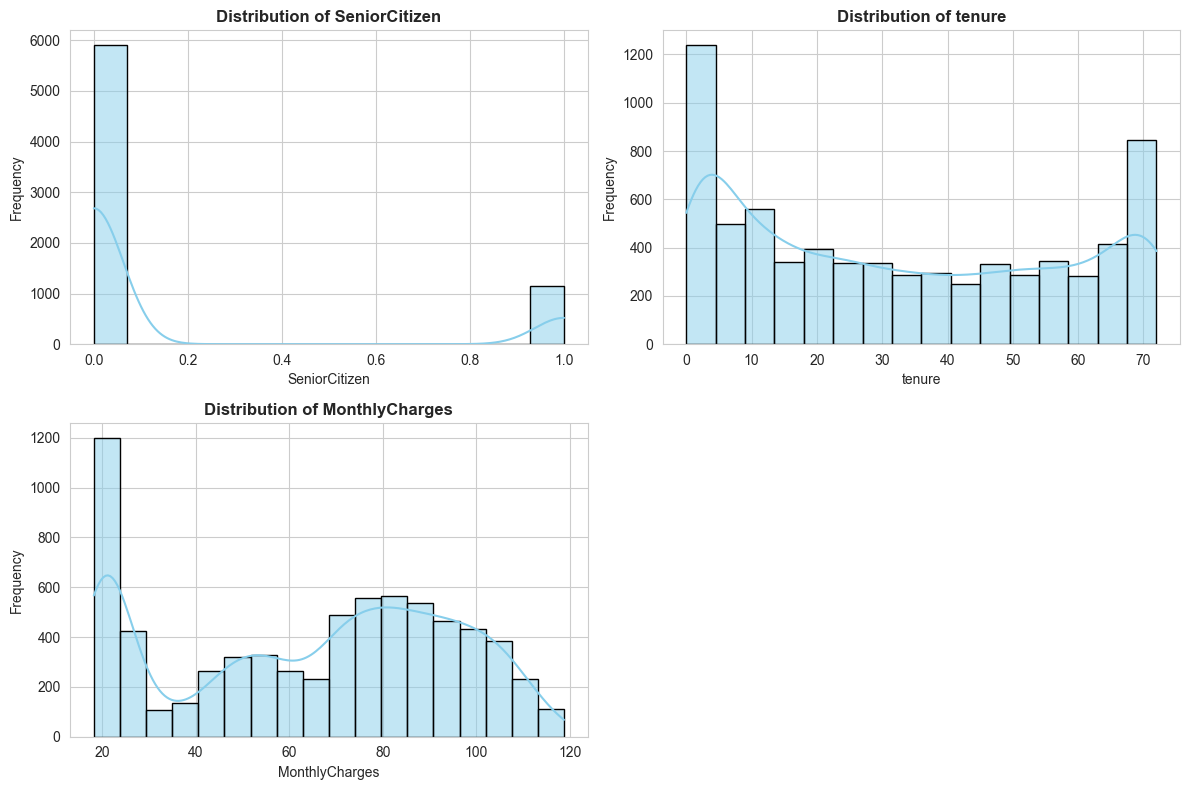

In [17]:
# visualize the numerical columns

# Settings for a clean look
sns.set_style("whitegrid")

# Calculate grid size for subplots
n_cols = 2
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(12, 4 * n_rows))

for i, col in enumerate(num_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    
    # Plot histogram with KDE
    sns.histplot(df[col], kde=True, ax=ax, color='skyblue', edgecolor='black')
    
    ax.set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [18]:
str_cols[-1]

'Churn'

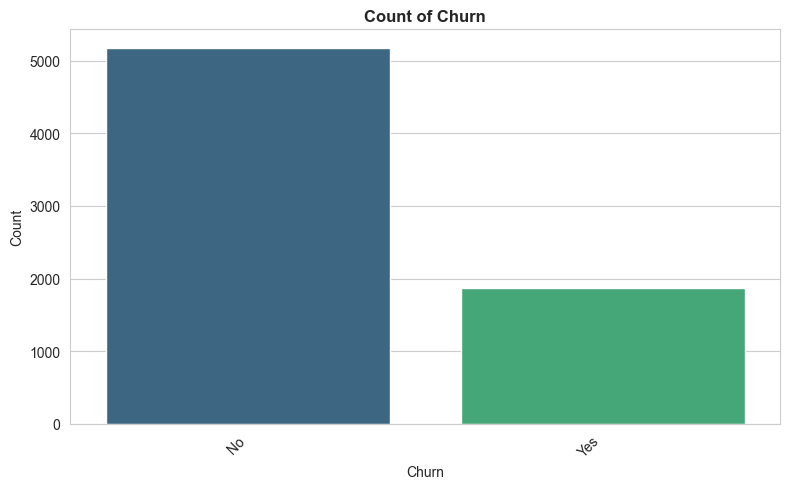

In [19]:
# Calculate grid size for subplots
n_cols = 2
n_rows = 1

plt.figure(figsize=(8, 5))

col = 'Churn'
ax = plt.subplot(1, 1, 1)

order = df[col].value_counts().index

sns.countplot(
    data=df,
    x=col,
    hue=col,
    legend=False,
    order=order,
    ax=ax,
    palette='viridis'
)

ax.set_title(f'Count of {col}', fontsize=12, fontweight='bold')
ax.set_xlabel(col)
ax.set_ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


<h4 style="text-decoration:underline">3.Churn Correlation Heatmap
.</h4>

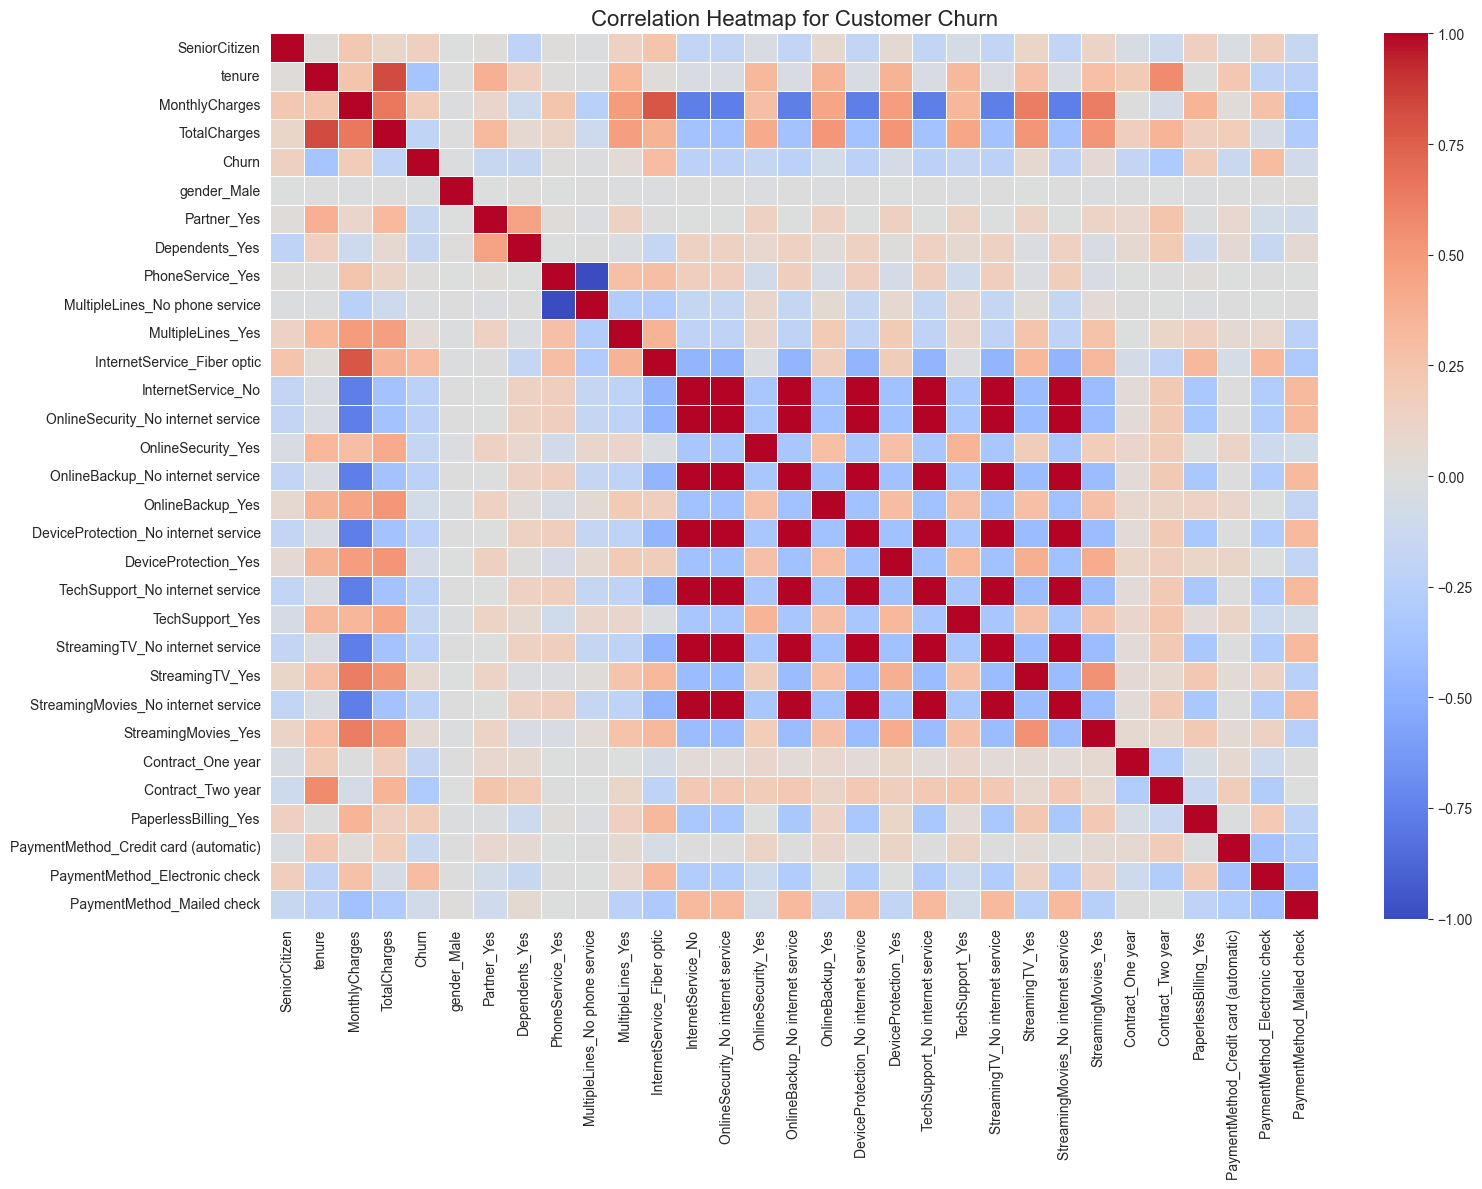


Correlation with Churn:

Churn                                    1.000000
InternetService_Fiber optic              0.307463
PaymentMethod_Electronic check           0.301455
MonthlyCharges                           0.192858
PaperlessBilling_Yes                     0.191454
SeniorCitizen                            0.150541
StreamingTV_Yes                          0.063254
StreamingMovies_Yes                      0.060860
MultipleLines_Yes                        0.040033
PhoneService_Yes                         0.011691
gender_Male                             -0.008545
MultipleLines_No phone service          -0.011691
DeviceProtection_Yes                    -0.066193
OnlineBackup_Yes                        -0.082307
PaymentMethod_Mailed check              -0.090773
PaymentMethod_Credit card (automatic)   -0.134687
Partner_Yes                             -0.149982
Dependents_Yes                          -0.163128
TechSupport_Yes                         -0.164716
OnlineSecurity_Yes      

In [20]:
# ================================
# Churn Correlation Heatmap
# ================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------
# 1. Load dataset
# ----------------
# CHANGE THIS PATH to your dataset location
#DATASET_PATH = "WA_Fn-UseC_-Telco-Customer-Churn.csv"   # example: r"C:\Users\You\Desktop\telco.csv"

#df = pd.read_csv(DATASET_PATH)

# ----------------
# 2. Basic cleaning
# ----------------
# Convert TotalCharges to numeric (sometimes loaded as string)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Drop rows with missing values (small dataset safety)
df = df.dropna()

# ----------------
# 3. Encode target
# ----------------
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Drop customerID (identifier, not useful for correlation)
df = df.drop(columns=["customerID"])

# ----------------
# 4. Encode categorical variables
# ----------------
df_encoded = pd.get_dummies(df, drop_first=True)

# ----------------
# 5. Correlation matrix
# ----------------
corr_matrix = df_encoded.corr()

# ----------------
# 6. Heatmap
# ----------------
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Correlation Heatmap for Customer Churn", fontsize=16)
plt.tight_layout()
plt.show()

# ----------------
# 7. Churn correlations only
# ----------------
churn_corr = corr_matrix["Churn"].sort_values(ascending=False)
print("\nCorrelation with Churn:\n")
print(churn_corr)


<h4 style="text-decoration:underline">4.Impute missing values (using mean/median) or drop rows with critical missing info.</h4>


In [21]:
# ------------------------
# Impute missing values
# ------------------------
# Check missing values first
print("Missing values per column:\n")
print(df.isnull().sum())

# For numeric columns, we can fill with median (robust to outliers)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# For categorical columns, we can fill with mode (most frequent value)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Optional: If there are still rows with critical missing info, drop them
df = df.dropna()

# Verify no missing values remain
print("\nAfter imputation, missing values per column:\n")
print(df.isnull().sum())


Missing values per column:

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

After imputation, missing values per column:

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
